# Individual Planning Report – Group 22

Prepared by: [Tousif Khan]

#### Data Description

Number of observations (rows): 196
Number of variables (columns): 7

This report uses the players.csv dataset, which records demographic and behavioral information for unique Minecraft server users as part of a research study at UBC. The data aim to help researchers understand player characteristics and factors related to game engagement.


#### Summary Statistic
| Variable      | Mean Value |
|--------------|------------|
| Age          | 21.14      |
| played_hours | 5.85       |

#### Name and type of variables and their meaning
| Variable      | Type                   | Meaning                                                               |
|--------------|------------------------|------------------------------------------------------------------------|
| Age          | Numeric                | Player's age in years                                                  |
| played_hours | Numeric                | Total hours the player spent playing on the research server            |
| subscribe    | Logical                | TRUE if player subscribed to the newsletter; FALSE otherwise           |
| experience   | String (categorical)   | Player's self-reported skill level (e.g., Pro, Novice, Veteran)        |
| gender       | String (categorical)   | Player's gender identity (self-reported)                               |
| hashedEmail  | String                 | Privacy-protected, hashed identifier for each player                   |
| name         | String                 | Player's chosen display name or username                               |

#### Data Issues and Limitations
Missing Values: There are 2 missing values (NAs) in the Age variable.

Potential Duplicate Names: Display names (name) are not guaranteed unique, and privacy-protected email hashes cannot be checked for duplicates easily.

Self-Reported Data: Experience and gender are self-reported and could, in other cases, introduce misclassifications or bias.

Selection Bias: The dataset only includes players who registered and played on the PLAIcraft server, which may not represent all Minecraft players.

#### Data Collection
Data was collected from registered players on the UBC PLAIcraft Minecraft server. Demographics and newsletter subscription status were obtained via registration forms. Played hours were tracked automatically through server logs, and all personal identifiers were anonymized for privacy.

#### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?


#### Specific Question
Can a player's age, experience level, and gender be used to predict their likelihood of subscribing to the newsletter, using the UBC PLAIcraft Minecraft dataset?

#### How the Data will help us address the Question and Wrangling

The dataset contains demographic and behavioral information for Minecraft players—including age, experience level, gender, and whether they subscribed to the newsletter. To answer my question, I will use these variables as predictors and the subscribe variable as the outcome for a classification task.

First, I’ll remove rows with missing values (e.g., 2 NAs in age). Then, I’ll convert experience and gender to factors so they can be used as predictors. Because KNN classification uses distances, I will also scale the numeric predictor(s) (like age and played hours) to ensure all variables are on similar scales before modeling.

### Methods and Plan
I will use k-nearest neighbors (KNN) classification to predict newsletter subscription from age, gender, and experience. KNN is suitable for binary outcomes and does not assume any relationship form, instead making predictions based on similar players. Before modeling, I will scale numeric variables and convert categorical predictors as needed.

The data will be randomly split into 70% training and 30% test sets. I will use the training set to fit KNN with different k values and evaluate classification accuracy on the test set to pick the best model.


In [3]:
library(readr)
players <- read_csv('Individual_Planning_Report_003_Group_22/players.csv')
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
library(dplyr)
players |> summarize(
  Mean_Age = round(mean(Age, na.rm = TRUE), 2),
  Mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2)
)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Mean_Age,Mean_played_hours
<dbl>,<dbl>
21.14,5.85


In [5]:
sum(is.na(players$Age))

[1] 2

#### Histogram of Age

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


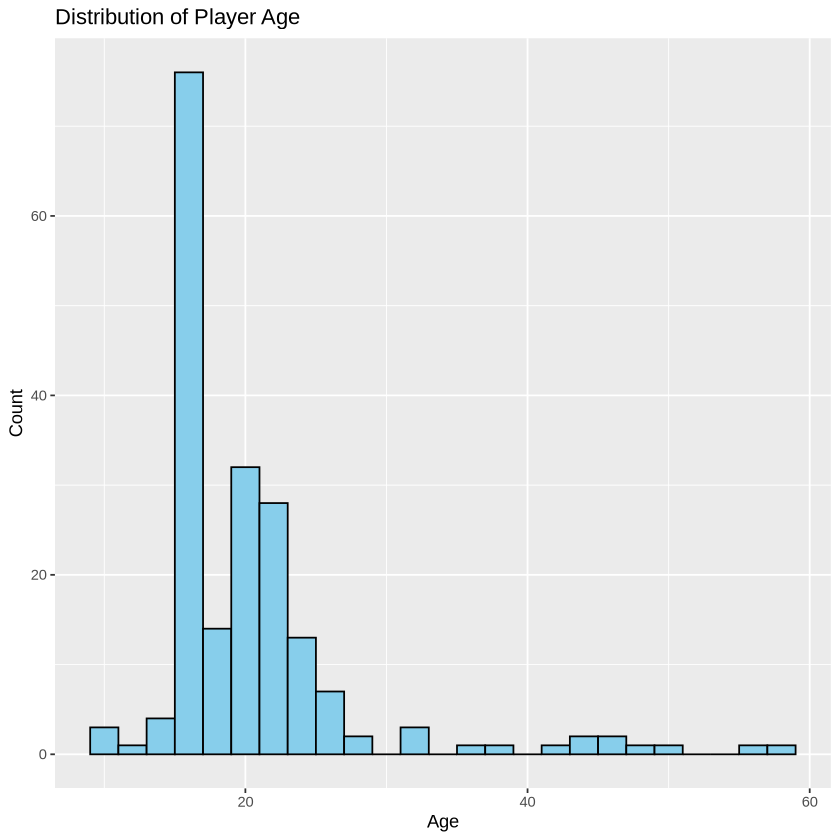

In [6]:
library(ggplot2)
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = 'skyblue', color = 'black') +
  labs(title = "Distribution of Player Age", x = "Age", y = "Count")


#### Bar Plot of Experience Level

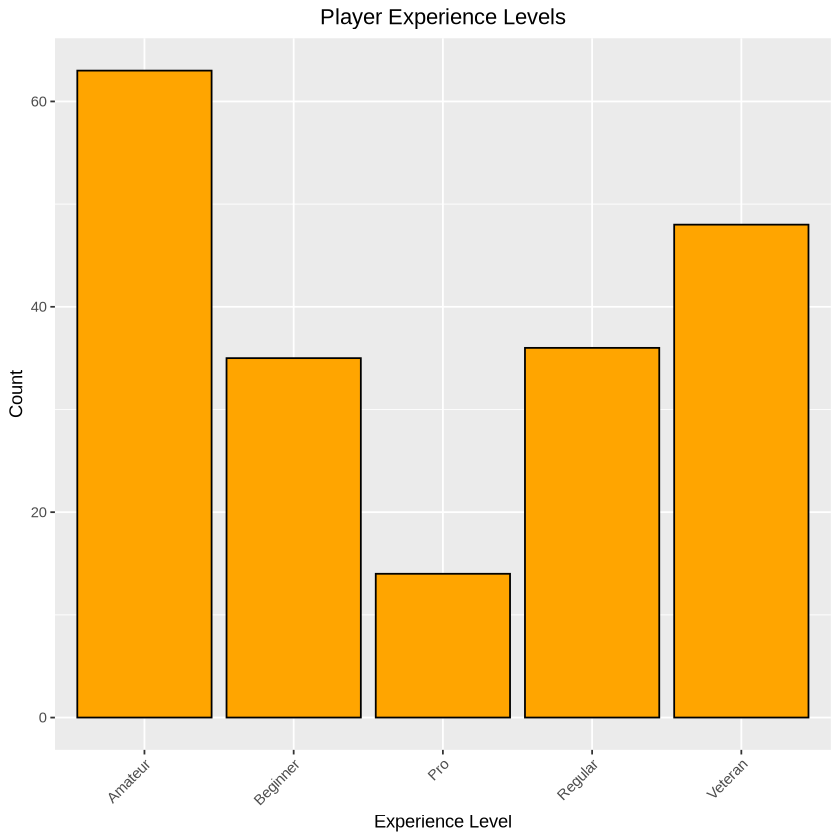

In [12]:
ggplot(players, aes(x = experience)) +
  geom_bar(fill = 'orange', color = 'black') +
  labs(title = "Player Experience Levels", x = "Experience Level", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))

#### Bar Plot of Newsletter Subscription

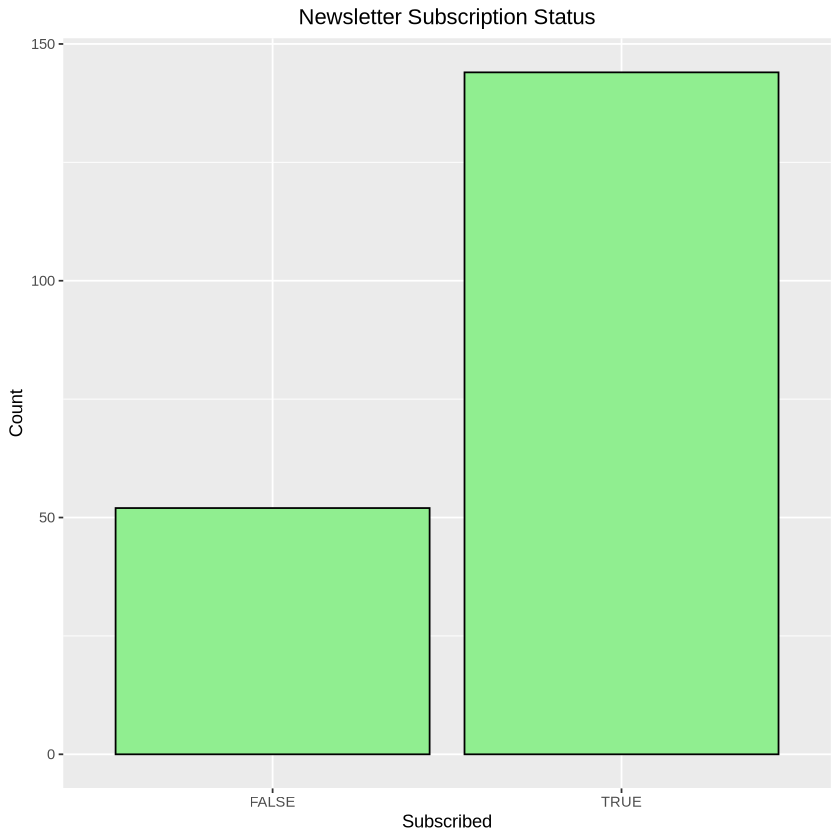

In [14]:
ggplot(players, aes(x = subscribe)) +
  geom_bar(fill = 'lightgreen', color = 'black') +
  labs(
    title = "Newsletter Subscription Status",
    x = "Subscribed",
    y = "Count"
  ) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(hjust = 0.5)
  )

Observations: 

Most players are between 18 and 25 years old, with few outside this range.

Pro' and 'Veteran' experience levels are common; relatively few 'Novice' players

The majority of players have subscribed to the newsletter, but there is a sizeable non-subscribed group.


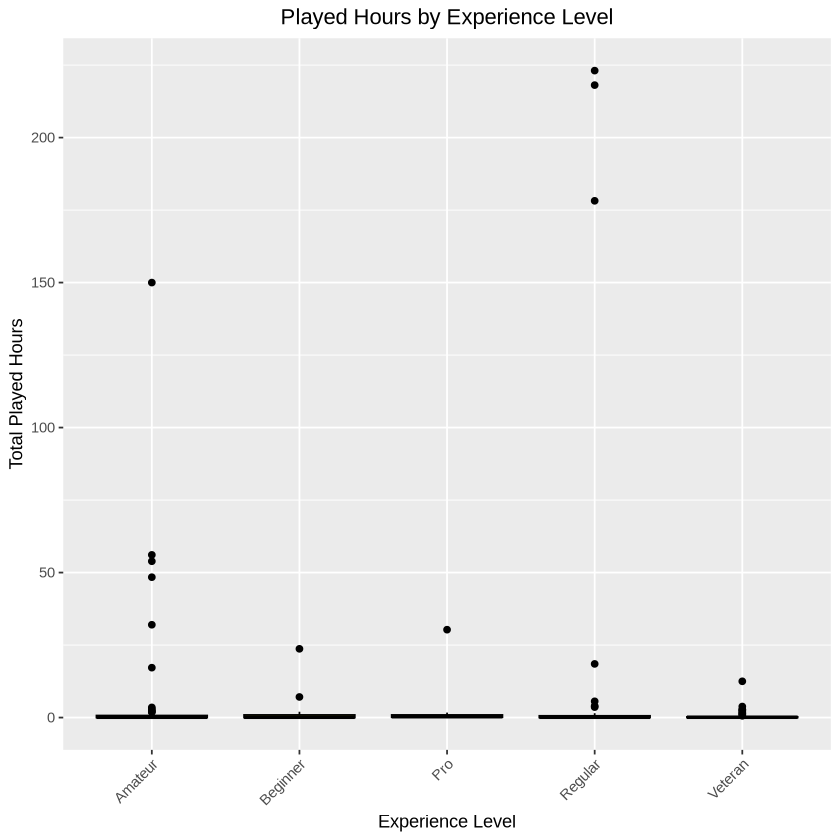

In [19]:
library(ggplot2)




ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(color = 'black') +
  labs(
    title = "Played Hours by Experience Level",
    x = "Experience Level",
    y = "Total Played Hours"
  ) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5),
    legend.position = "none"
  )